### Exploration des données 

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
data = pd.read_csv('../data/creditcard.csv')

Nous examinons les 5 premières lignes des données pour comprendre leur structure et confirmer leur chargement.

In [2]:
# Aperçu des premières lignes des données
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Informations générales sur le jeu de données**

Obtenons des informations globales : nombre de colonnes, types de données et valeurs manquantes.

In [3]:
# Informations sur les données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Le dataset analysé contient 284,807 transactions par carte de crédit, chacune décrite par 31 colonnes. Ce dataset est utilisé pour détecter des fraudes financières.

Les principales colonnes sont :
- **Time :** Représente le temps écoulé en secondes depuis la première transaction.
- **V1 à V28 :** Composantes principales générées par une transformation PCA (Principal Component Analysis) pour protéger la confidentialité des informations.
- **Amount :** Montant de la transaction.
- **Class :** Variable cible binaire indiquant si une transaction est frauduleuse (1) ou non (0).

Le dataset ne contient aucune valeur manquante. Toutes les colonnes numériques ont pour type float64, à l'exception de la colonne Class, qui est de type int64. L'ensemble des données occupe une mémoire de 67,4 Mo.

In [4]:

# Statistiques descriptives générales
data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Analyse et Conclusion des Statistiques Descriptives  

1. **Déséquilibre des classes :**  
   La variable cible `Class` montre un fort déséquilibre, avec seulement **0.17 % des transactions marquées comme frauduleuses**. Cela nécessitera l'utilisation de techniques adaptées, telles que :  
   - Suréchantillonnage (e.g., SMOTE) ou sous-échantillonnage.  
   - Utilisation de métriques comme le F1-score, l'AUC-ROC ou le rappel pour évaluer les performances du modèle.  

2. **Caractéristiques des montants (`Amount`) :**  
   Les montants varient de **0 à 25,691**, avec une moyenne de **88.35** et un écart-type élevé (**250.12**). Cette variabilité importante implique la nécessité de normaliser ou standardiser cette colonne avant son utilisation dans un modèle.  

3. **Colonnes PCA (`V1` à `V28`) :**  
   Ces colonnes sont déjà normalisées (moyenne proche de 0), ce qui les rend directement exploitables dans un modèle de machine learning.  

4. **Données temporelles (`Time`) :**  
   La colonne `Time`, exprimée en secondes depuis la première transaction, varie de **0 à 172,792** (environ 48 heures). Une analyse temporelle pourrait révéler des tendances liées à la fréquence ou au comportement des fraudes sur certaines périodes.  

### Points d'action :  
- Gérer le déséquilibre des classes pour éviter que le modèle ne favorise les transactions non frauduleuses.  
- Traiter les montants pour réduire l'impact des valeurs extrêmes.  
- Explorer les relations entre la variable temporelle et les comportements frauduleux.


Distribution des classes :
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


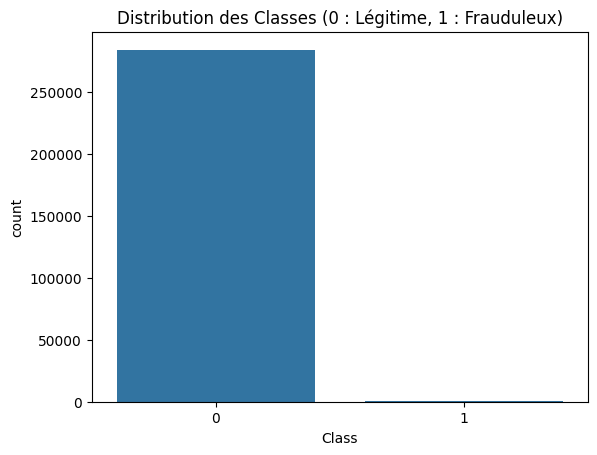

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
# Distribution des classes

class_distribution = data['Class'].value_counts(normalize=True) * 100
print("Distribution des classes :")
print(class_distribution)

# Visualisation de la distribution des classes
sns.countplot(x='Class', data=data)
plt.title('Distribution des Classes (0 : Légitime, 1 : Frauduleux)')
plt.show()
data.Class.value_counts()


Les données sont fortement déséquilibrées. La majorité des transactions sont légitimes (`Class = 0`), tandis qu'une minorité sont frauduleuses (`Class = 1`).

##### **Exploration des variables Time et Amount**

Ces variables n'ont pas été normalisées via ACP et doivent être examinées pour détecter d'éventuelles anomalies ou tendances.

In [1]:
# Distribution de la variable `Time`
plt.figure(figsize=(10, 5))
sns.histplot(data['Time'], bins=50, kde=True, color='blue')
plt.title('Distribution de la variable Time')
plt.xlabel('Temps écoulé (secondes)')
plt.savefig('../results/figures/distribution-time.png')
plt.show()



NameError: name 'plt' is not defined

Le graphique montre **une distribution bimodale** de la variable **Time**, avec des pics d'activité autour de 75 000 et 150 000 secondes, reflétant des périodes spécifiques de forte activité. Les transactions sont moins fréquentes entre ces pics, suggérant des variations liées aux habitudes des utilisateurs. Cette variable pourrait être utile pour détecter des anomalies temporelles liées à des comportements frauduleux.

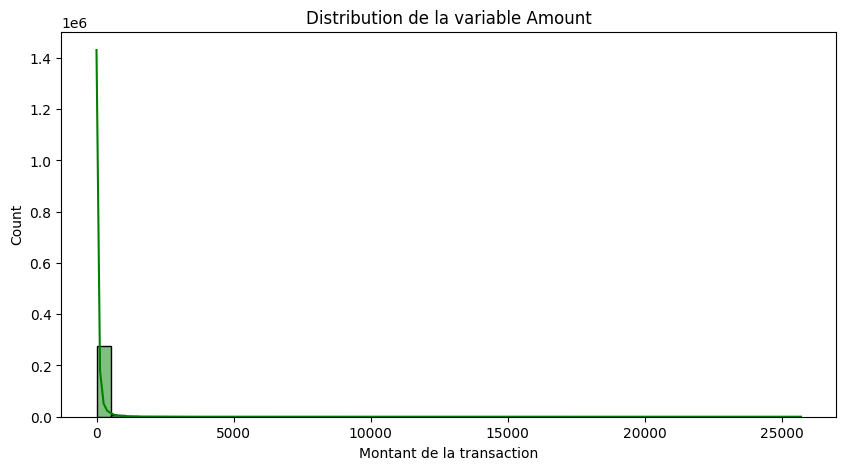

In [ ]:
# Distribution de la variable `Amount`
plt.figure(figsize=(10, 5))
sns.histplot(data['Amount'], bins=50, kde=True, color='green')
plt.title('Distribution de la variable Amount')
plt.xlabel('Montant de la transaction')
plt.savefig('../results/figures/distribution-amount.png')
plt.show()



Le graphique montre une **distribution fortement asymétrique** de la variable **Amount**, représentant le montant des transactions. On observe une concentration de valeurs proches de zéro, avec une petite proportion de transactions ayant des montants élevés allant jusqu'à 25 000. Cette distribution suggère la présence de valeurs aberrantes et une forte dominance de petites transactions, ce qui peut être pertinent pour détecter des comportements inhabituels ou frauduleux.


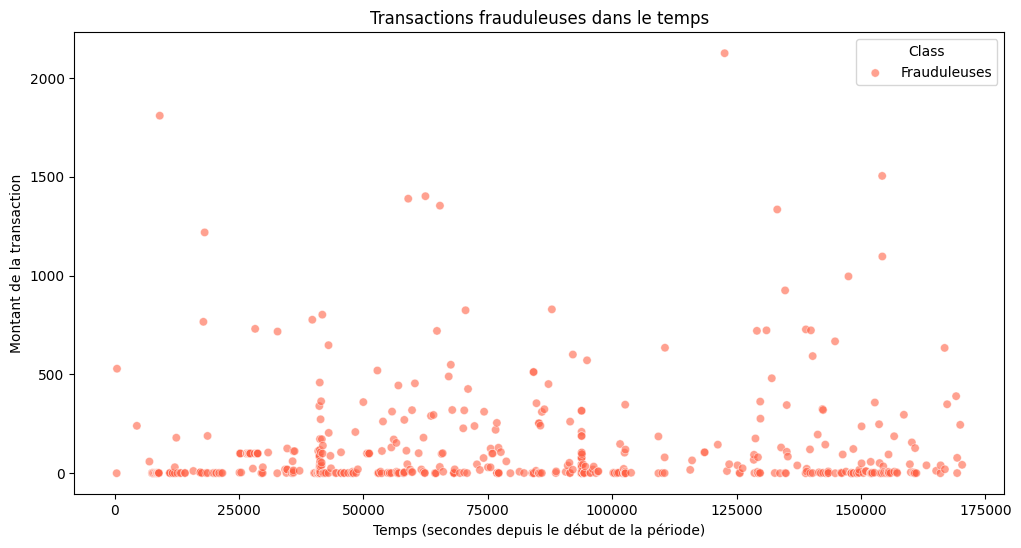

In [ ]:
# Filtrer les données pour n'afficher que les transactions frauduleuses (Class = 1)
fraudulent_data = data[data['Class'] == 1]

# Transactions contre le temps pour visualiser les tendances
plt.figure(figsize=(12, 6))  # Taille du graphique ajustée
sns.scatterplot(x='Time', y='Amount', data=fraudulent_data, hue='Class', palette=['#FF6347'], alpha=0.6)  # Rouge pour frauduleux
plt.title('Transactions frauduleuses dans le temps')
plt.xlabel('Temps (secondes depuis le début de la période)')
plt.ylabel('Montant de la transaction')

# Réduire l'espacement entre les chiffres des axes
plt.xticks(fontsize=10)  # Taille de police des labels sur l'axe x
plt.yticks(fontsize=10)  # Taille de police des labels sur l'axe y

plt.savefig('../results/figures/transactions_frauduleuses.png')


plt.legend(title='Class', labels=['Frauduleuses'])
plt.show()


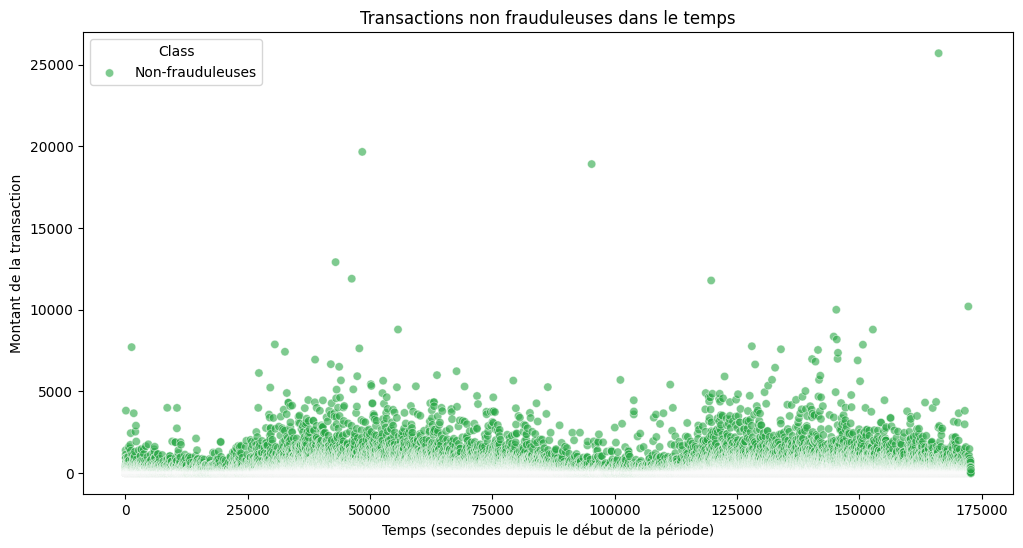

In [10]:
# Filtrer les données pour n'afficher que les transactions non frauduleuses (Class = 0)
non_fraudulent_data = data[data['Class'] == 0]

# Transactions contre le temps pour visualiser les tendances
plt.figure(figsize=(12, 6))  # Taille du graphique ajustée
sns.scatterplot(x='Time', y='Amount', data=non_fraudulent_data, hue='Class', palette=['#28A745'], alpha=0.6)  # Vert pour non frauduleux
plt.title('Transactions non frauduleuses dans le temps')
plt.xlabel('Temps (secondes depuis le début de la période)')
plt.ylabel('Montant de la transaction')

# Réduire l'espacement entre les chiffres des axes
plt.xticks(fontsize=10)  # Taille de police des labels sur l'axe x
plt.yticks(fontsize=10)  # Taille de police des labels sur l'axe y

plt.legend(title='Class', labels=['Non-frauduleuses'])

# Sauvegarder le graphique dans le dossier 'results/figures'
plt.savefig('../results/figures/transactions_non_frauduleuses.png')

# Afficher le graphique
plt.show()


On peut observer que les transactions frauduleuses sont réparties relativement **uniformément** dans le temps, sans grande concentration à des moments spécifiques de la journée. Contrairement aux transactions légitimes qui sont souvent plus concentrées pendant les heures de travail classiques, les transactions frauduleuses semblent se produire à toute heure, y compris pendant la nuit (en Europe), une période généralement moins active pour les utilisateurs réels. Cela pourrait indiquer que les fraudeurs agissent à des moments où les utilisateurs légitimes sont moins susceptibles d'être actifs, ce qui rend les fraudes moins détectables.

**Distribution du montant des transactions (Amount)**

/tmp/ipykernel_10334/2806336427.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=data, palette='coolwarm')


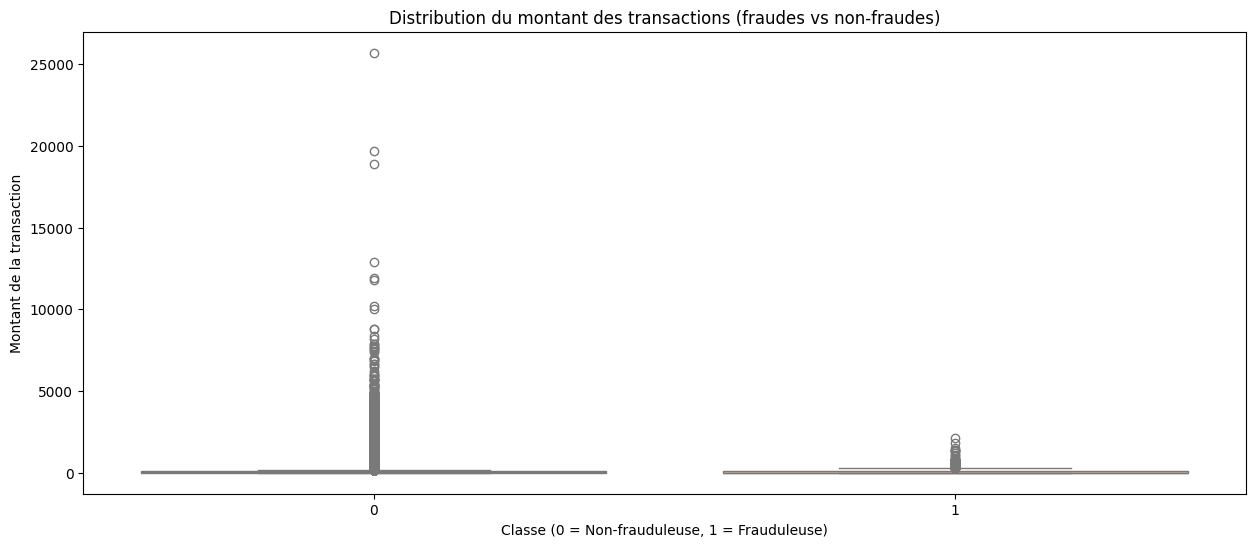

In [11]:
# Histogramme du montant des transactions pour les classes frauduleuses et non frauduleuses
plt.figure(figsize=(15, 6))
sns.boxplot(x='Class', y='Amount', data=data, palette='coolwarm')
plt.title('Distribution du montant des transactions (fraudes vs non-fraudes)')
plt.xlabel('Classe (0 = Non-frauduleuse, 1 = Frauduleuse)')
plt.ylabel('Montant de la transaction')
plt.show()



In [12]:
# Statistiques descriptives de `Time` et `Amount`
data[['Time', 'Amount']].describe()


,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


Les transactions frauduleuses semblent avoir une distribution asymétrique, avec une médiane plus faible et des outliers plus proches de la moyenne, ce qui pourrait suggérer que les fraudeurs réalisent des montants plus petits et plus fréquents. En revanche, les transactions légitimes ont une gamme plus large de montants, avec des valeurs plus élevées et des valeurs aberrantes qui pourraient être des achats réels de grande envergure.

**Corrélation des caractéristiques (Features Correlation)**

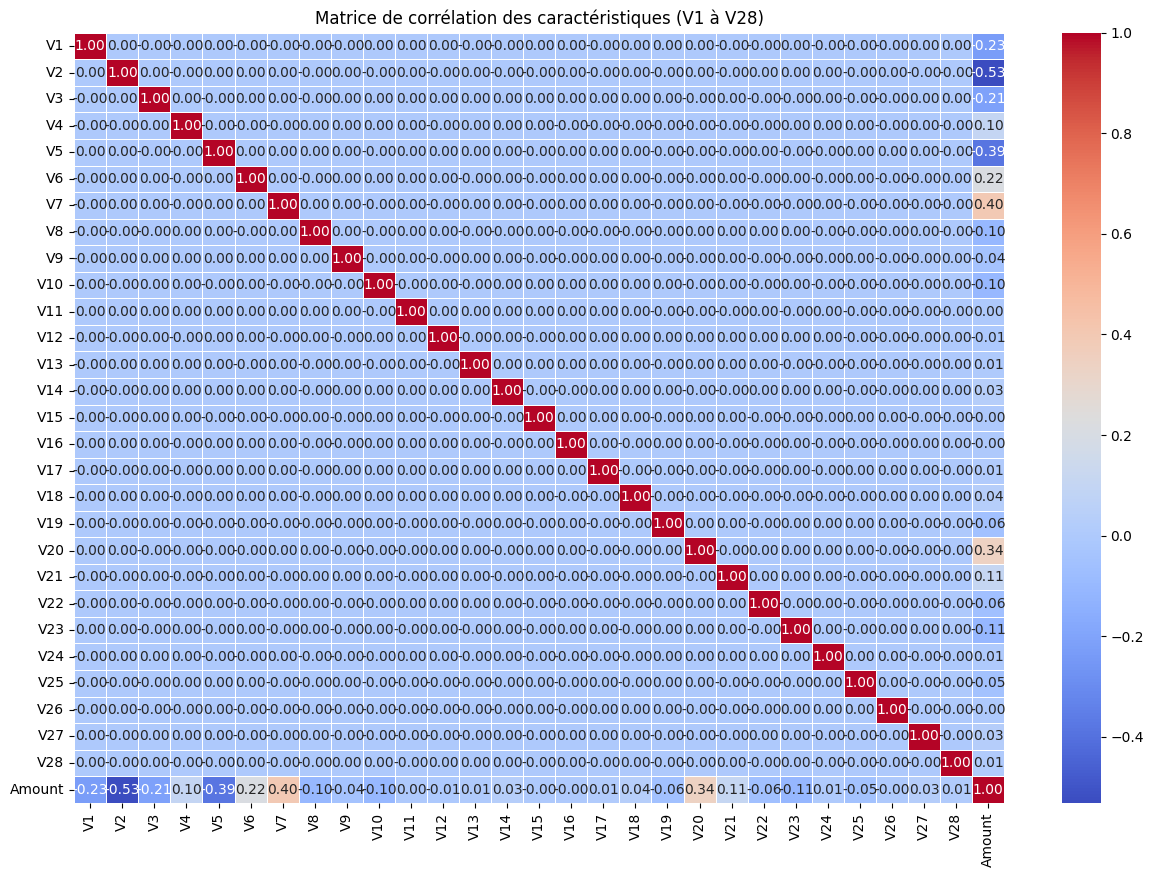

In [ ]:
# Calcul de la matrice de corrélation pour les variables V1 à V28
corr_matrix = data.iloc[:, 1:30].corr()  # Utilisation des variables transformées (V1 à V28)

# Affichage de la matrice de corrélation
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation des caractéristiques (V1 à V28)')
plt.savefig('../results/figures/matrice-corre.png')
plt.show()


La matrice de corrélation montre comment les différentes caractéristiques sont liées entre elles, en particulier celles qui ont été transformées par ACP (Analyse en Composantes Principales). Ce graphique permet de visualiser les relations entre les différentes variables et d'identifier les couples de caractéristiques qui sont fortement corrélés ou inversement corrélés.